In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-05T18:32:50.790213+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
seaborn: 0.13.2
teeplot: 1.4.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.9087066650390625e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.11838006973266602}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.005681514739990234}
!!! {"init_...": 0.0005843639373779297}
!!! {"ete3Tree": 0.5513582229614258}
!!! {"GenomeTree_hierarchical": 0.0021736621856689453}
!!! {"mutateBranchETEhierarchy": 0.0908052921295166}
!!! {"write_genome_short": 0.04474782943725586}


  1%|          | 1/193 [00:01<03:48,  1.19s/it]

!!! {"writeGenomeNoIndels": 0.16849684715270996}
!!! {"pl.DataFrame": 0.045522212982177734}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.915064811706543}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.018247365951538086}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003494739532470703}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013566017150878906}
!!! {"init_...": 0.000507354736328125}
!!! {"ete3Tree": 7.677078247070312e-05}
!!! {"GenomeTree_hierarchical": 0.0020856857299804688}
!!! {"mutateBranchETEhierarchy": 1.5020370483398438e-05}
!!! {"write_genome_short": 0.0007903575897

  8%|▊         | 15/193 [00:01<00:11, 15.97it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=103, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003378629684448242}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.894371032714844e-05}
!!! {"init_...": 0.0004096031188964844}
!!! {"ete3Tree": 0.0007693767547607422}
!!! {"GenomeTree_hierarchical": 0.0019314289093017578}
!!! {"mutateBranchETEhierarchy": 0.0001308917999267578}
!!! {"write_genome_short": 0.0001323223114013672}
!!! {"writeGenomeNoIndels": 0.00023937225341796875}
!!! {"pl.DataFrame": 0.00017571449279785156}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0056629180908203125}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00

 13%|█▎        | 26/193 [00:01<00:06, 25.69it/s]

!!! {"init_...": 0.0007586479187011719}
!!! {"ete3Tree": 0.019850730895996094}
!!! {"GenomeTree_hierarchical": 0.0019168853759765625}
!!! {"mutateBranchETEhierarchy": 0.004503726959228516}
!!! {"write_genome_short": 0.002280712127685547}
!!! {"writeGenomeNoIndels": 0.007676124572753906}
!!! {"pl.DataFrame": 0.0014522075653076172}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04041409492492676}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0008289813995361328}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003077983856201172}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001063346862

 21%|██        | 40/193 [00:01<00:03, 39.34it/s]

!!! {"phastSimRun": 0.00012969970703125}
!!! {"init_...": 0.0005497932434082031}
!!! {"ete3Tree": 6.127357482910156e-05}
!!! {"GenomeTree_hierarchical": 0.0020639896392822266}
!!! {"mutateBranchETEhierarchy": 9.775161743164062e-06}
!!! {"write_genome_short": 8.058547973632812e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 7.367134094238281e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005028486251831055}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001785755157470703}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003077983856201172}
enter log_context_duration for _do_r

 24%|██▍       | 46/193 [00:02<00:03, 40.12it/s]

!!! {"phastSimRun": 0.0001010894775390625}
!!! {"init_...": 0.0005488395690917969}
!!! {"ete3Tree": 0.020876646041870117}
!!! {"GenomeTree_hierarchical": 0.0019729137420654297}
!!! {"mutateBranchETEhierarchy": 0.00494384765625}
!!! {"write_genome_short": 0.0023603439331054688}
!!! {"writeGenomeNoIndels": 0.008496999740600586}
!!! {"pl.DataFrame": 0.0015933513641357422}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.042964935302734375}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0010459423065185547}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030286312103271484}
enter log_context_duration for _do_run_ph

 31%|███       | 60/193 [00:02<00:02, 50.63it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.6941299438476562e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033919811248779297}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.655952453613281e-05}
!!! {"init_...": 0.000423431396484375}
!!! {"ete3Tree": 5.91278076171875e-05}
!!! {"GenomeTree_hierarchical": 0.0020492076873779297}
!!! {"mutateBranchETEhierarchy": 9.5367431640625e-06}
!!! {"write_genome_short": 6.532669067382812e-05}
!!! {"writeGenomeNoIndels": 6.198883056640625e-06}
!!! {"pl.DataFrame": 6.651878356933594e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004412174224853516}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001742839

 38%|███▊      | 74/193 [00:02<00:02, 56.63it/s]

!!! {"write_genome_short": 0.0005297660827636719}
!!! {"writeGenomeNoIndels": 4.029273986816406e-05}
!!! {"pl.DataFrame": 9.799003601074219e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005894660949707031}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017070770263671875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030188560485839844}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011205673217773438}
!!! {"init_...": 0.00040221214294433594}
!!! {"ete3Tree": 5.650520324707031e-05}
!!! {"GenomeTree_hierarchical": 0.0020532608032226562}
!!! {"mutateBranchETEhierarchy": 9.775

 42%|████▏     | 81/193 [00:03<00:04, 27.56it/s]

!!! {"mutateBranchETEhierarchy": 0.3558676242828369}
!!! {"write_genome_short": 0.0014591217041015625}
!!! {"writeGenomeNoIndels": 0.0029129981994628906}
!!! {"pl.DataFrame": 0.0006871223449707031}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.37299370765686035}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005583763122558594}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=683, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004261970520019531}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013208389282226562}
!!! {"init_...": 0.00047898292541503906}
!!! {"ete3Tree": 0.0038824081420898438}
!!! {"GenomeTree_hierarchical": 0.00207734

 47%|████▋     | 91/193 [00:03<00:03, 31.27it/s]

!!! {"init_...": 0.0007083415985107422}
!!! {"ete3Tree": 7.05718994140625e-05}
!!! {"GenomeTree_hierarchical": 0.002448558807373047}
!!! {"mutateBranchETEhierarchy": 1.0013580322265625e-05}
!!! {"write_genome_short": 0.0004115104675292969}
!!! {"writeGenomeNoIndels": 6.9141387939453125e-06}
!!! {"pl.DataFrame": 6.937980651855469e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005457401275634766}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00018596649169921875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=11, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030548572540283203}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.63211

 53%|█████▎    | 103/193 [00:03<00:02, 38.67it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.86102294921875e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0035157203674316406}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.775161743164062e-05}
!!! {"init_...": 0.00043201446533203125}
!!! {"ete3Tree": 5.817413330078125e-05}
!!! {"GenomeTree_hierarchical": 0.002705097198486328}
!!! {"mutateBranchETEhierarchy": 1.0013580322265625e-05}
!!! {"write_genome_short": 8.535385131835938e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 6.771087646484375e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005115509033203125}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000199

 60%|█████▉    | 115/193 [00:03<00:01, 46.75it/s]

!!! {"write_genome_short": 0.0005137920379638672}
!!! {"writeGenomeNoIndels": 7.152557373046875e-06}
!!! {"pl.DataFrame": 7.009506225585938e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005039215087890625}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00018167495727539062}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031855106353759766}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.775161743164062e-05}
!!! {"init_...": 0.000431060791015625}
!!! {"ete3Tree": 5.888938903808594e-05}
!!! {"GenomeTree_hierarchical": 0.0020754337310791016}
!!! {"mutateBranchETEhierarchy": 9.775161

 63%|██████▎   | 121/193 [00:03<00:01, 48.08it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.005376577377319336}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010156631469726562}
!!! {"init_...": 0.00043392181396484375}
!!! {"ete3Tree": 0.003177165985107422}
!!! {"GenomeTree_hierarchical": 0.0019593238830566406}
!!! {"mutateBranchETEhierarchy": 0.0006976127624511719}
!!! {"write_genome_short": 0.001131296157836914}
!!! {"writeGenomeNoIndels": 0.0012440681457519531}
!!! {"pl.DataFrame": 0.0003097057342529297}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.011051416397094727}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00028133392333984375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_

 69%|██████▉   | 134/193 [00:04<00:01, 54.41it/s]

!!! {"phastSimRun": 9.989738464355469e-05}
!!! {"init_...": 0.0005445480346679688}
!!! {"ete3Tree": 5.841255187988281e-05}
!!! {"GenomeTree_hierarchical": 0.002076387405395508}
!!! {"mutateBranchETEhierarchy": 9.5367431640625e-06}
!!! {"write_genome_short": 6.628036499023438e-05}
!!! {"writeGenomeNoIndels": 5.9604644775390625e-06}
!!! {"pl.DataFrame": 6.604194641113281e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004871368408203125}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001800060272216797}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003071308135986328}
enter log_context_duration for _do_r

 76%|███████▌  | 147/193 [00:04<00:00, 50.38it/s]

!!! {"init_...": 0.0007834434509277344}
!!! {"ete3Tree": 7.2479248046875e-05}
!!! {"GenomeTree_hierarchical": 0.0021212100982666016}
!!! {"mutateBranchETEhierarchy": 1.0251998901367188e-05}
!!! {"write_genome_short": 0.0004324913024902344}
!!! {"writeGenomeNoIndels": 1.1205673217773438e-05}
!!! {"pl.DataFrame": 9.298324584960938e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005350589752197266}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002014636993408203}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=5, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031175613403320312}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.000102

 79%|███████▉  | 153/193 [00:04<00:00, 46.75it/s]

!!! {"ete3Tree": 0.024597883224487305}
!!! {"GenomeTree_hierarchical": 0.001987457275390625}
!!! {"mutateBranchETEhierarchy": 0.005660295486450195}
!!! {"write_genome_short": 0.003033161163330078}
!!! {"writeGenomeNoIndels": 0.009374380111694336}
!!! {"pl.DataFrame": 0.0017070770263671875}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04861164093017578}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0010249614715576172}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030896663665771484}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011968612670898438}
!!! {"init_...": 0.00045442581

 82%|████████▏ | 158/193 [00:04<00:00, 46.31it/s]

!!! {"phastSimRun": 0.00011014938354492188}
!!! {"init_...": 0.0005333423614501953}
!!! {"ete3Tree": 0.00011754035949707031}
!!! {"GenomeTree_hierarchical": 0.002051830291748047}
!!! {"mutateBranchETEhierarchy": 2.1219253540039062e-05}
!!! {"write_genome_short": 7.390975952148438e-05}
!!! {"writeGenomeNoIndels": 3.0994415283203125e-05}
!!! {"pl.DataFrame": 7.319450378417969e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005039215087890625}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017213821411132812}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=21664, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.03578639030456543}
enter log_context_duration 

 87%|████████▋ | 167/193 [00:05<00:01, 15.20it/s]

!!! {"phastSimRun": 0.00013375282287597656}
!!! {"init_...": 0.0005977153778076172}
!!! {"ete3Tree": 7.224082946777344e-05}
!!! {"GenomeTree_hierarchical": 0.0021762847900390625}
!!! {"mutateBranchETEhierarchy": 1.2636184692382812e-05}
!!! {"write_genome_short": 7.2479248046875e-05}
!!! {"writeGenomeNoIndels": 6.9141387939453125e-06}
!!! {"pl.DataFrame": 0.00011658668518066406}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005866289138793945}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002694129943847656}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
len(phylogeny_df)=625, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004178524017333984}
enter log_context_duration for

 92%|█████████▏| 177/193 [00:06<00:00, 21.32it/s]

!!! {"ete3Tree": 0.06374192237854004}
!!! {"GenomeTree_hierarchical": 0.00203704833984375}
!!! {"mutateBranchETEhierarchy": 0.014921188354492188}
!!! {"write_genome_short": 0.007426261901855469}
!!! {"writeGenomeNoIndels": 0.02544689178466797}
!!! {"pl.DataFrame": 0.00479888916015625}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.12085127830505371}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0023577213287353516}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032765865325927734}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001366138458251953}
!!! {"init_...": 0.00050115585327148

 94%|█████████▍| 182/193 [00:06<00:00, 25.46it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.006609916687011719}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.965896606445312e-05}
!!! {"init_...": 0.0004477500915527344}
!!! {"ete3Tree": 0.009609699249267578}
!!! {"GenomeTree_hierarchical": 0.0019750595092773438}
!!! {"mutateBranchETEhierarchy": 0.0022699832916259766}
!!! {"write_genome_short": 0.0011904239654541016}
!!! {"writeGenomeNoIndels": 0.0036339759826660156}
!!! {"pl.DataFrame": 0.0007314682006835938}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.02167654037475586}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004975795745849609}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_new

100%|██████████| 193/193 [00:06<00:00, 29.53it/s]

exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05815720558166504}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0016143321990966797}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031478404998779297}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011682510375976562}
!!! {"init_...": 0.0004563331604003906}
!!! {"ete3Tree": 6.556510925292969e-05}
!!! {"GenomeTree_hierarchical": 0.002412080764770508}
!!! {"mutateBranchETEhierarchy": 1.0728836059570312e-05}
!!! {"write_genome_short": 7.390975952148438e-05}
!!! {"writeGenomeNoIndels": 6.67572021484375e-06}
!!! {"pl.DataFrame": 7.6293945

exit log_context_duration for extract variant
!!! {"extract variant": 0.097412109375}
enter log_context_duration for prepend sequence
exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.275341272354126}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.031418800354003906}
enter log_context_duration for _add_sequence_diffs


  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002538919448852539}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.035475969314575195}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.009192228317260742}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002424001693725586}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.034802913665771484}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002615690231323242}
enter log_context_duration for seq_

 43%|████▎     | 3/7 [00:00<00:00, 21.22it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03340888023376465}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0034465789794921875}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0027189254760742188}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03360867500305176}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0035905838012695312}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0024204254150390625}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches


100%|██████████| 7/7 [00:00<00:00, 23.15it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.033202171325683594}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0024569034576416016}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0026035308837890625}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03319501876831055}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003693819046020508}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0015056133270263672}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mis

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.2801070213317871}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 37
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 38
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


exit log_context_duration for alifestd_mark_clade_subtended_duration_ratio_sister_asexual
!!! {"alifestd_mark_clade_subtended_duration_ratio_sister_asexual": 0.19252753257751465}
enter log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual



100%|██████████| 4086/4086 [00:25<00:00, 161.67it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 27.135486841201782}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 4086/4086 [00:06<00:00, 597.54it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 138.42976593971252}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.06975078582763672}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 197.74467873573303}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.00872945785522461}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0003325939178466797}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.0004093647003173828}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0003771781921386719}
ancestral_s


100%|██████████| 368/368 [00:00<00:00, 190838.76it/s]

process mutations:   0%|          | 1/368 [00:00<01:16,  4.81it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:18<14:10,  2.36s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   20.7s



process mutations:  13%|█▎        | 48/368 [01:10<07:36,  1.43s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.3min



process mutations:  24%|██▍       | 88/368 [02:05<06:30,  1.39s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  2.2min



process mutations:  35%|███▍      | 128/368 [02:58<05:28,  1.37s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  3.2min



process mutations:  46%|████▌     | 168/368 [03:52<04:31,  1.36s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  4.1min



process mutations:  57%|█████▋    | 208/368 [04:45<03:35,  1.35s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  5.1min



process mutations:  67%|██████▋   | 248/368 [05:39<02:42,  1.35s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  6.0min



process mutations:  78%|███████▊  | 288/368 [06:34<01:48,  1.36s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  6.9min



process mutations:  89%|████████▉ | 328/368 [07:30<00:54,  1.37s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  7.8min



process mutations: 100%|██████████| 368/368 [08:29<00:00,  1.38s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  8.5min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  8.7min finished


process replicate: 100%|██████████| 1/1 [12:03<00:00, 723.29s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.09312248229980469}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 113
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> 'fe51f235-625d-8137-a7fc-d69cfb7fcad3', 'fe51f235-625d-8137-a7fc-d69cfb7fcad3', 'fe51f235-625d-8137-a7fc-d69cfb
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 7925, 8040, 7924, 8040, 6882
$ phyo_df_screened_len           <u16> 247, 132, 248, 132, 1290
$ tb_stat                     

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


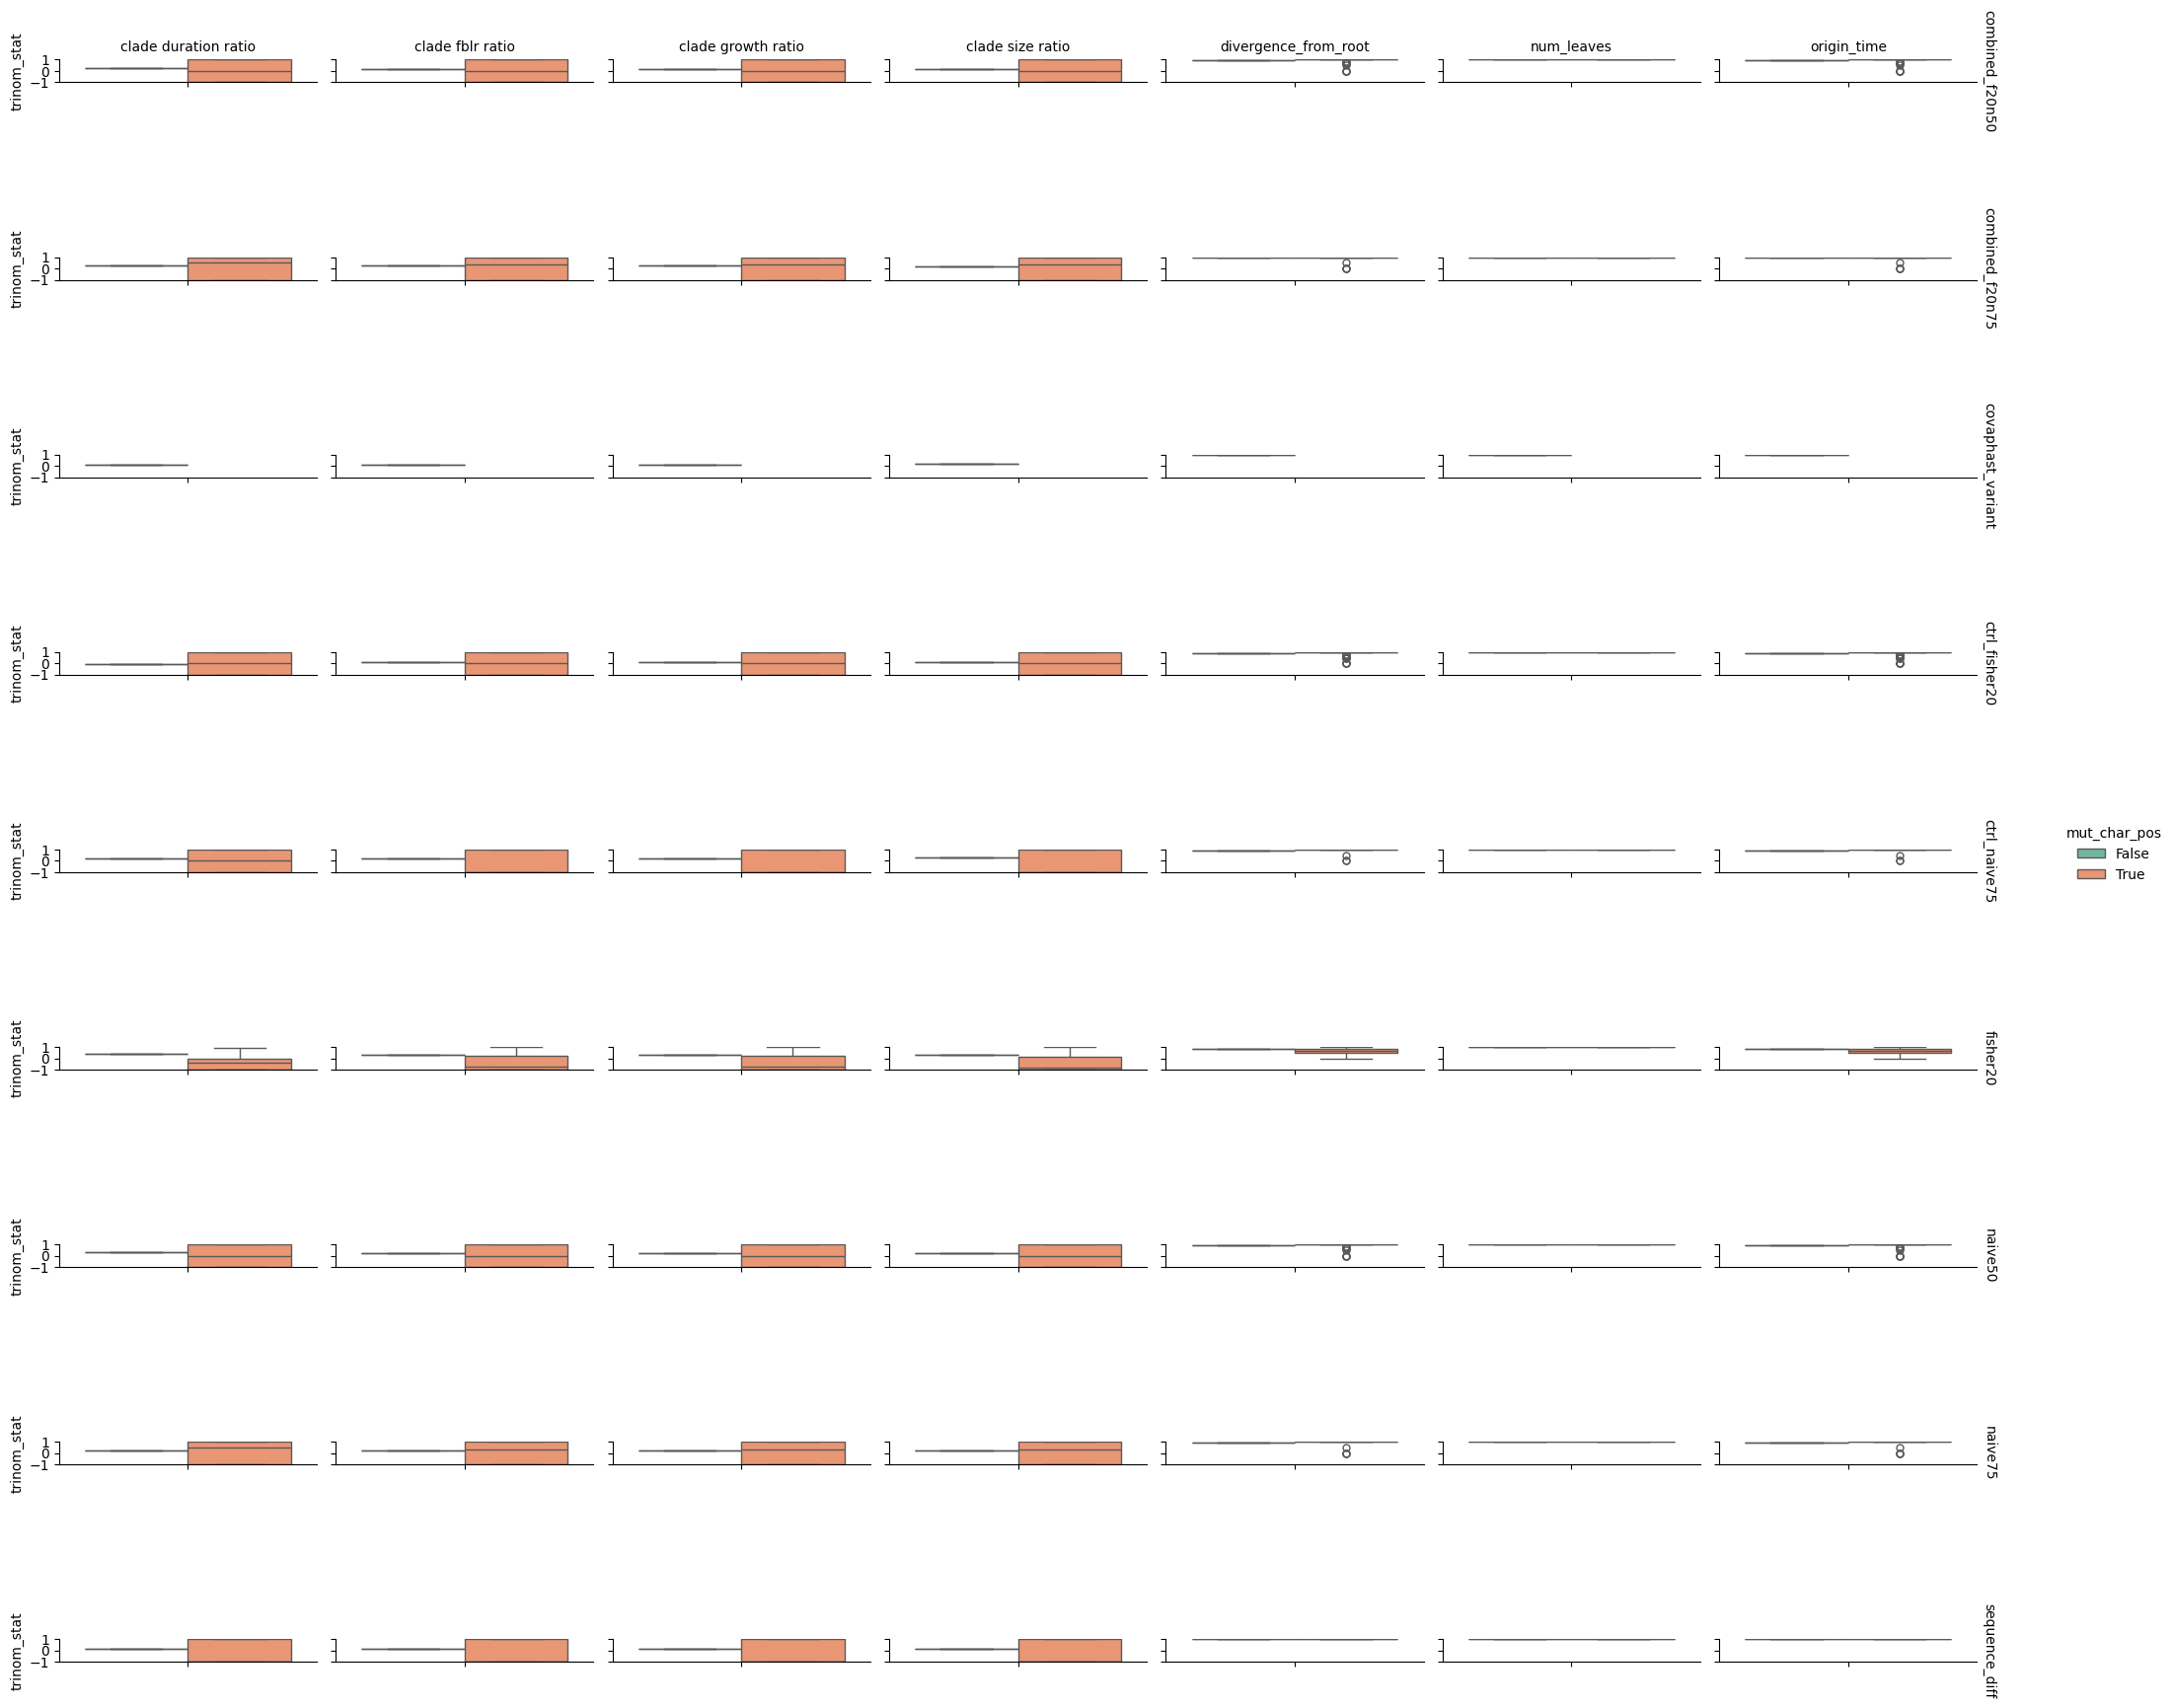

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


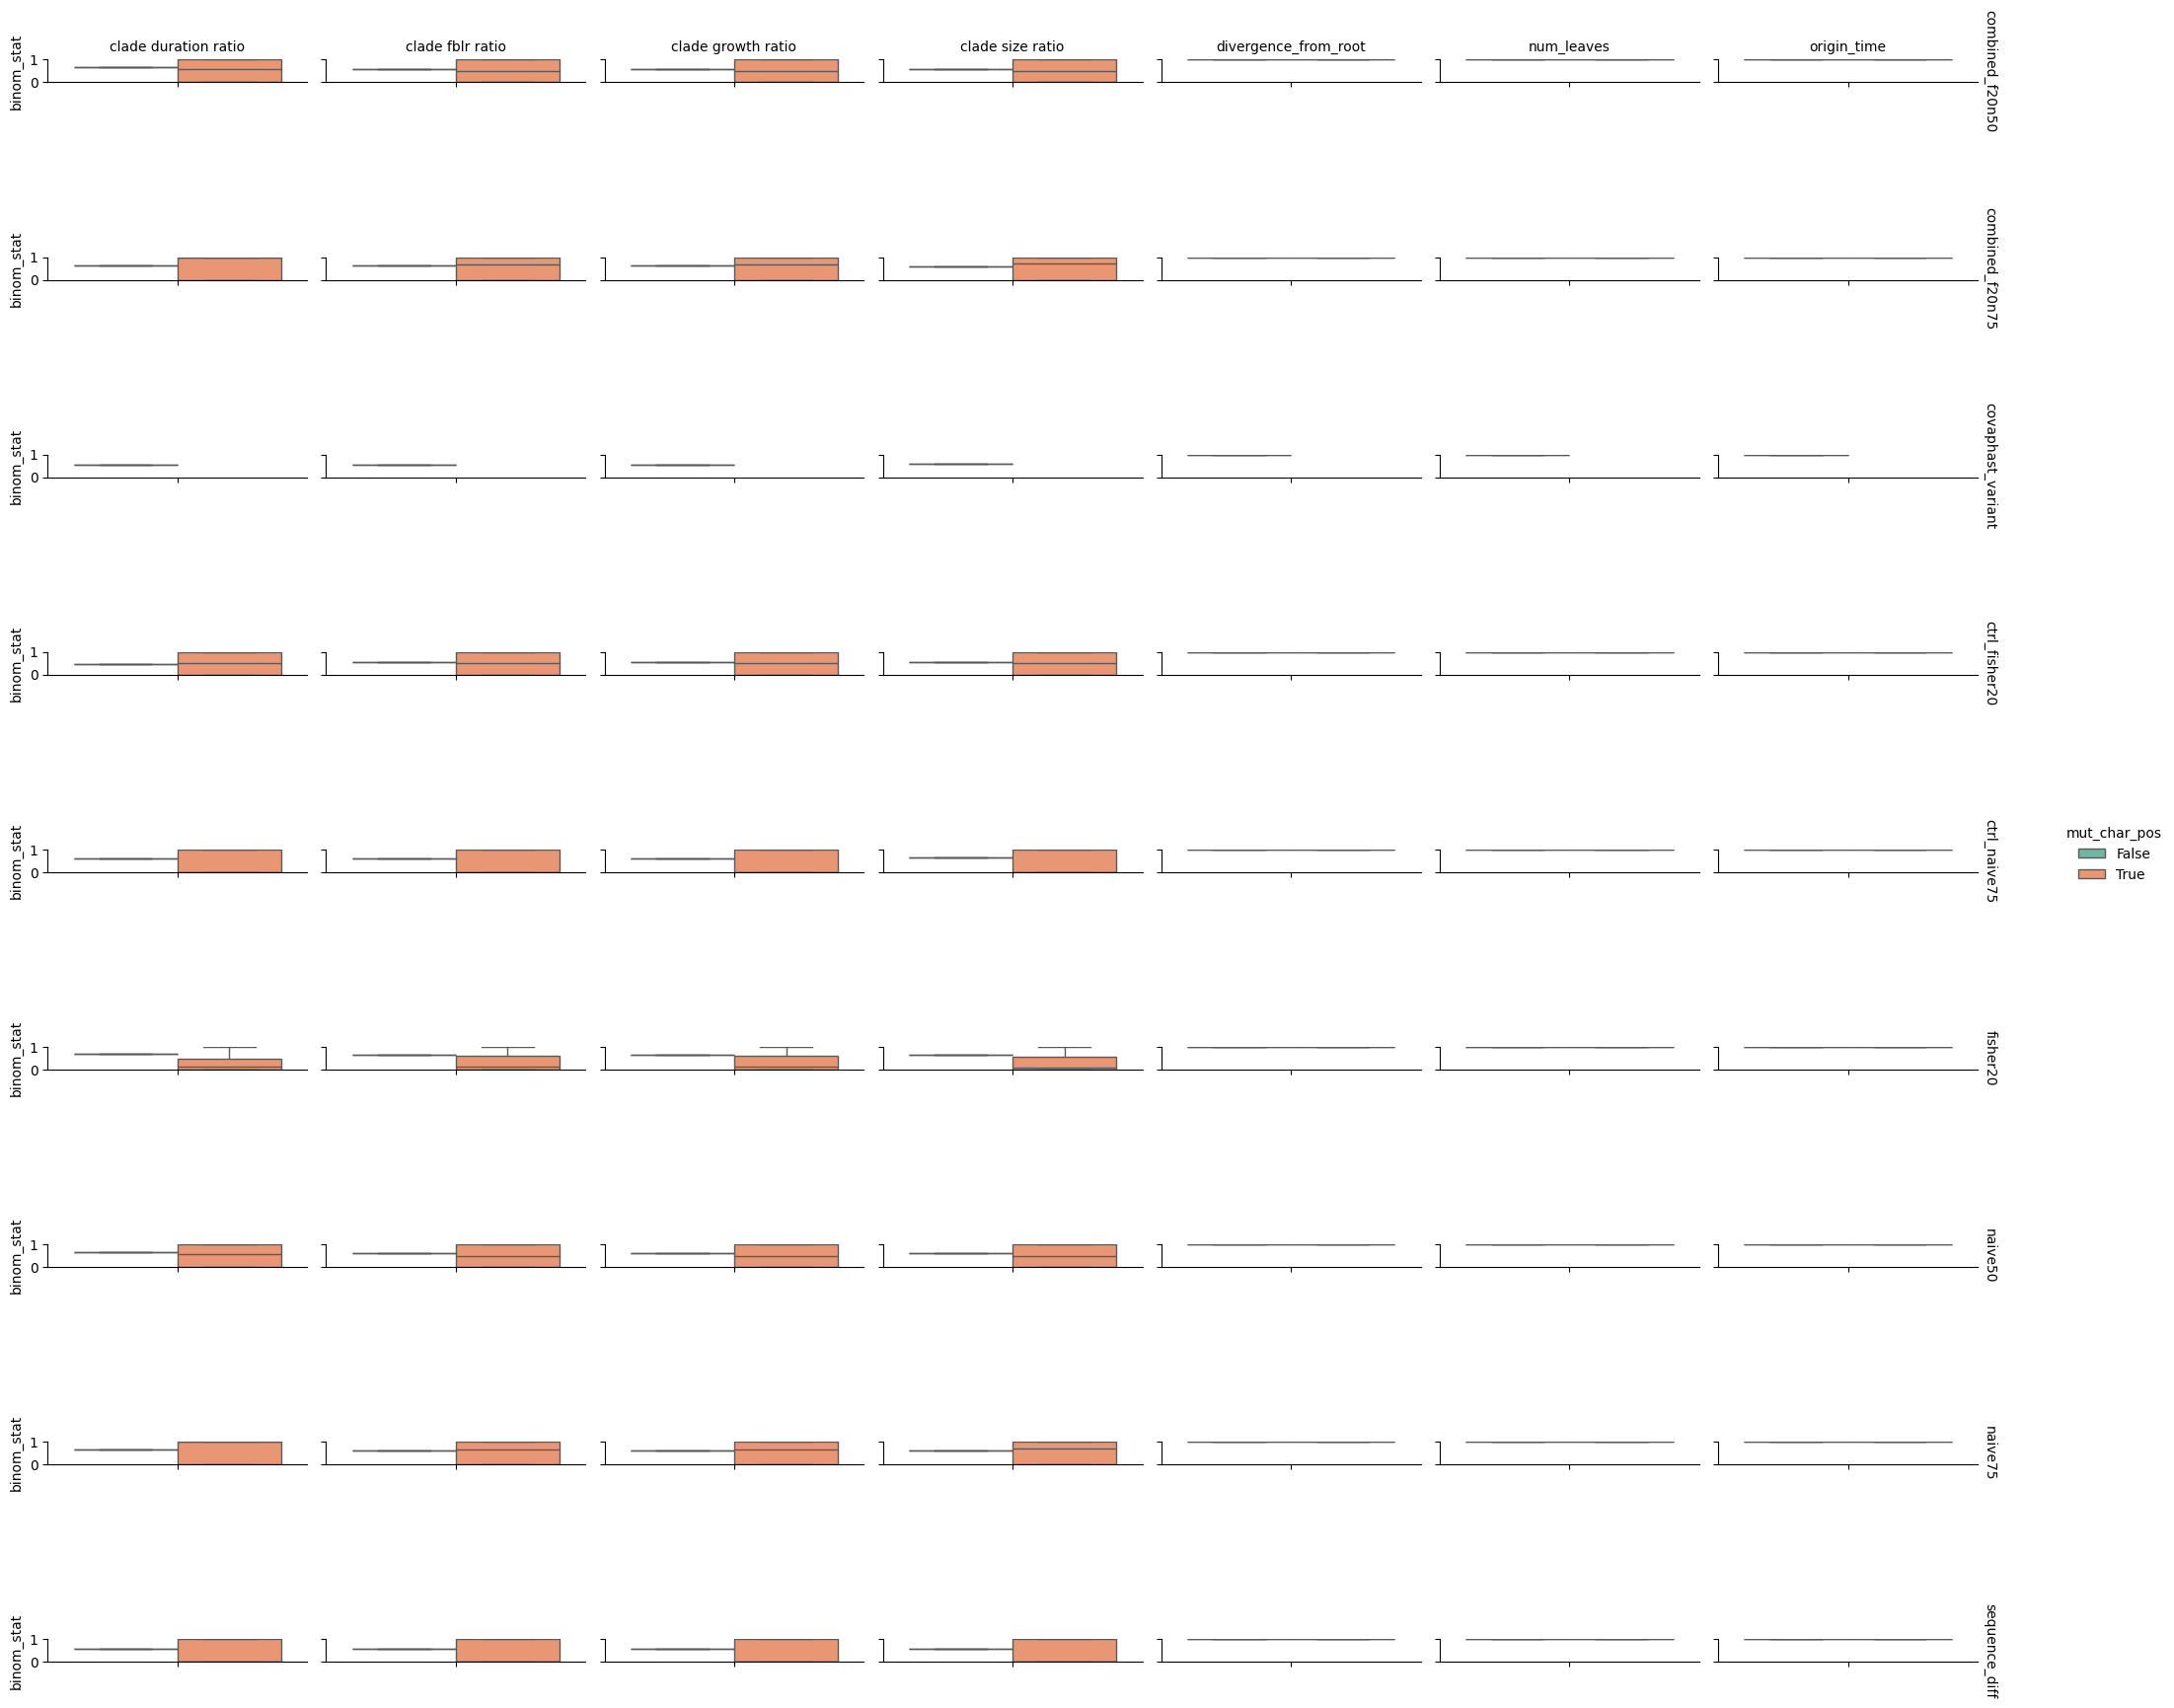

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


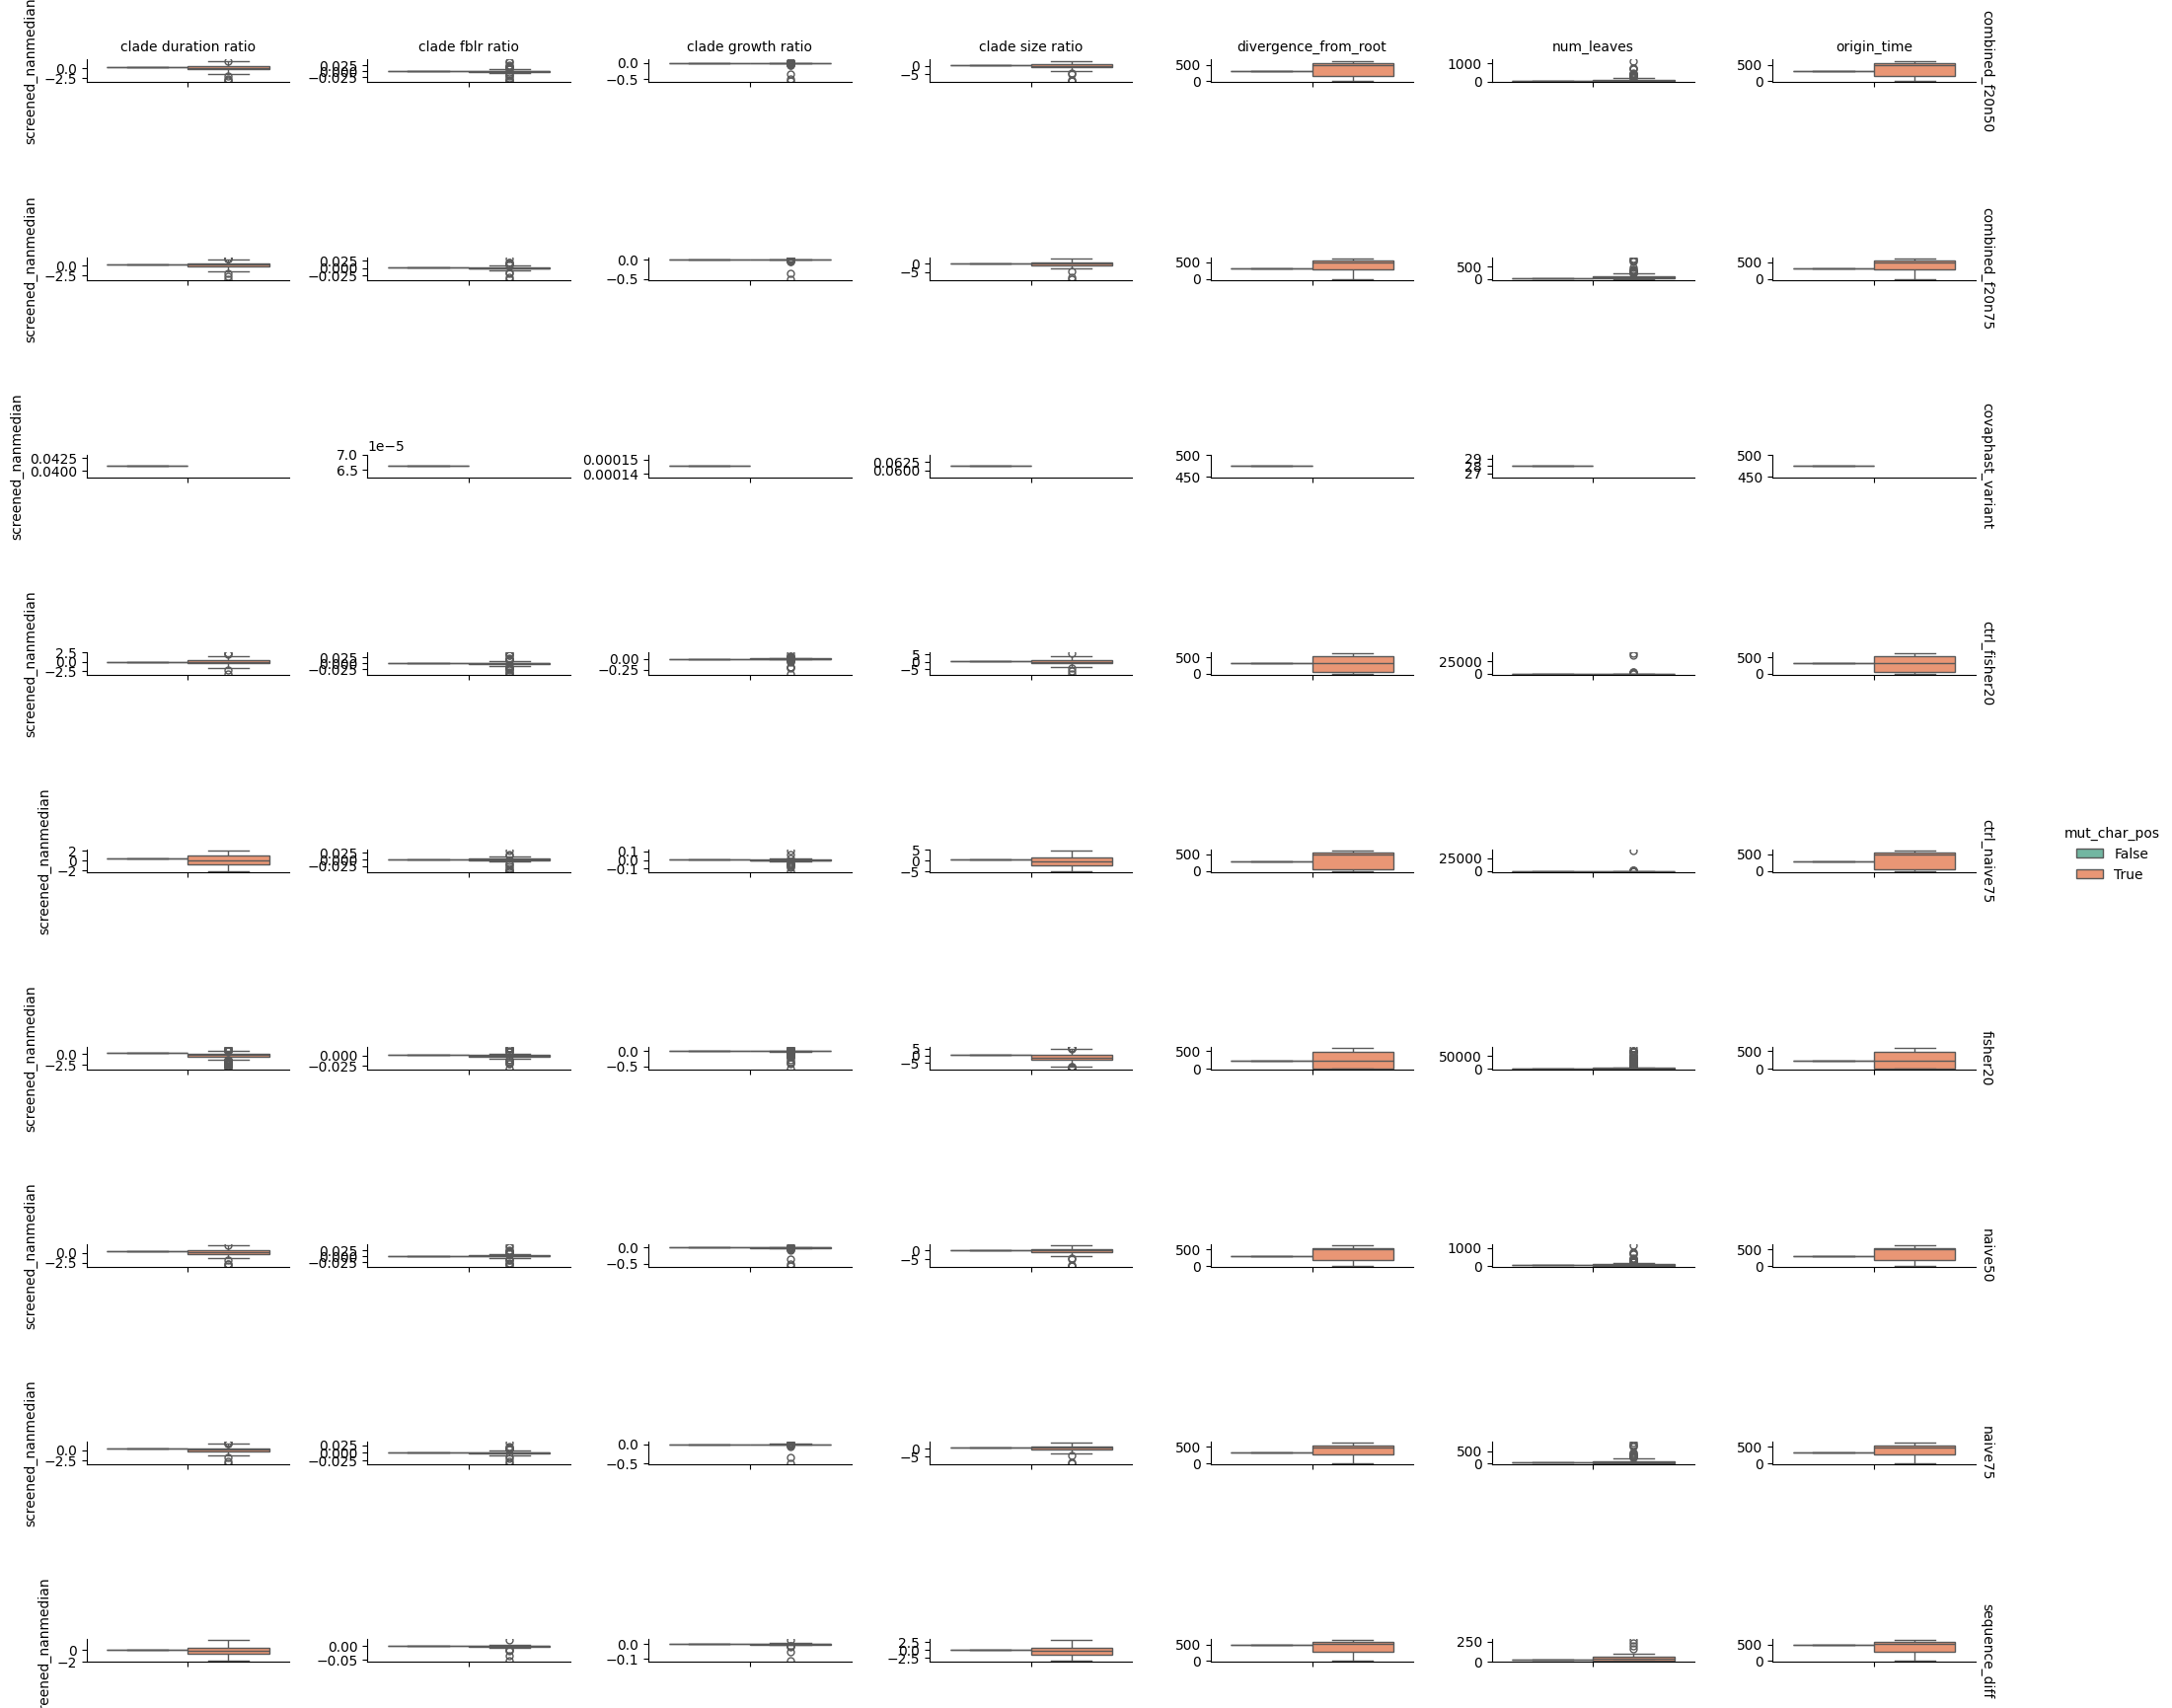

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


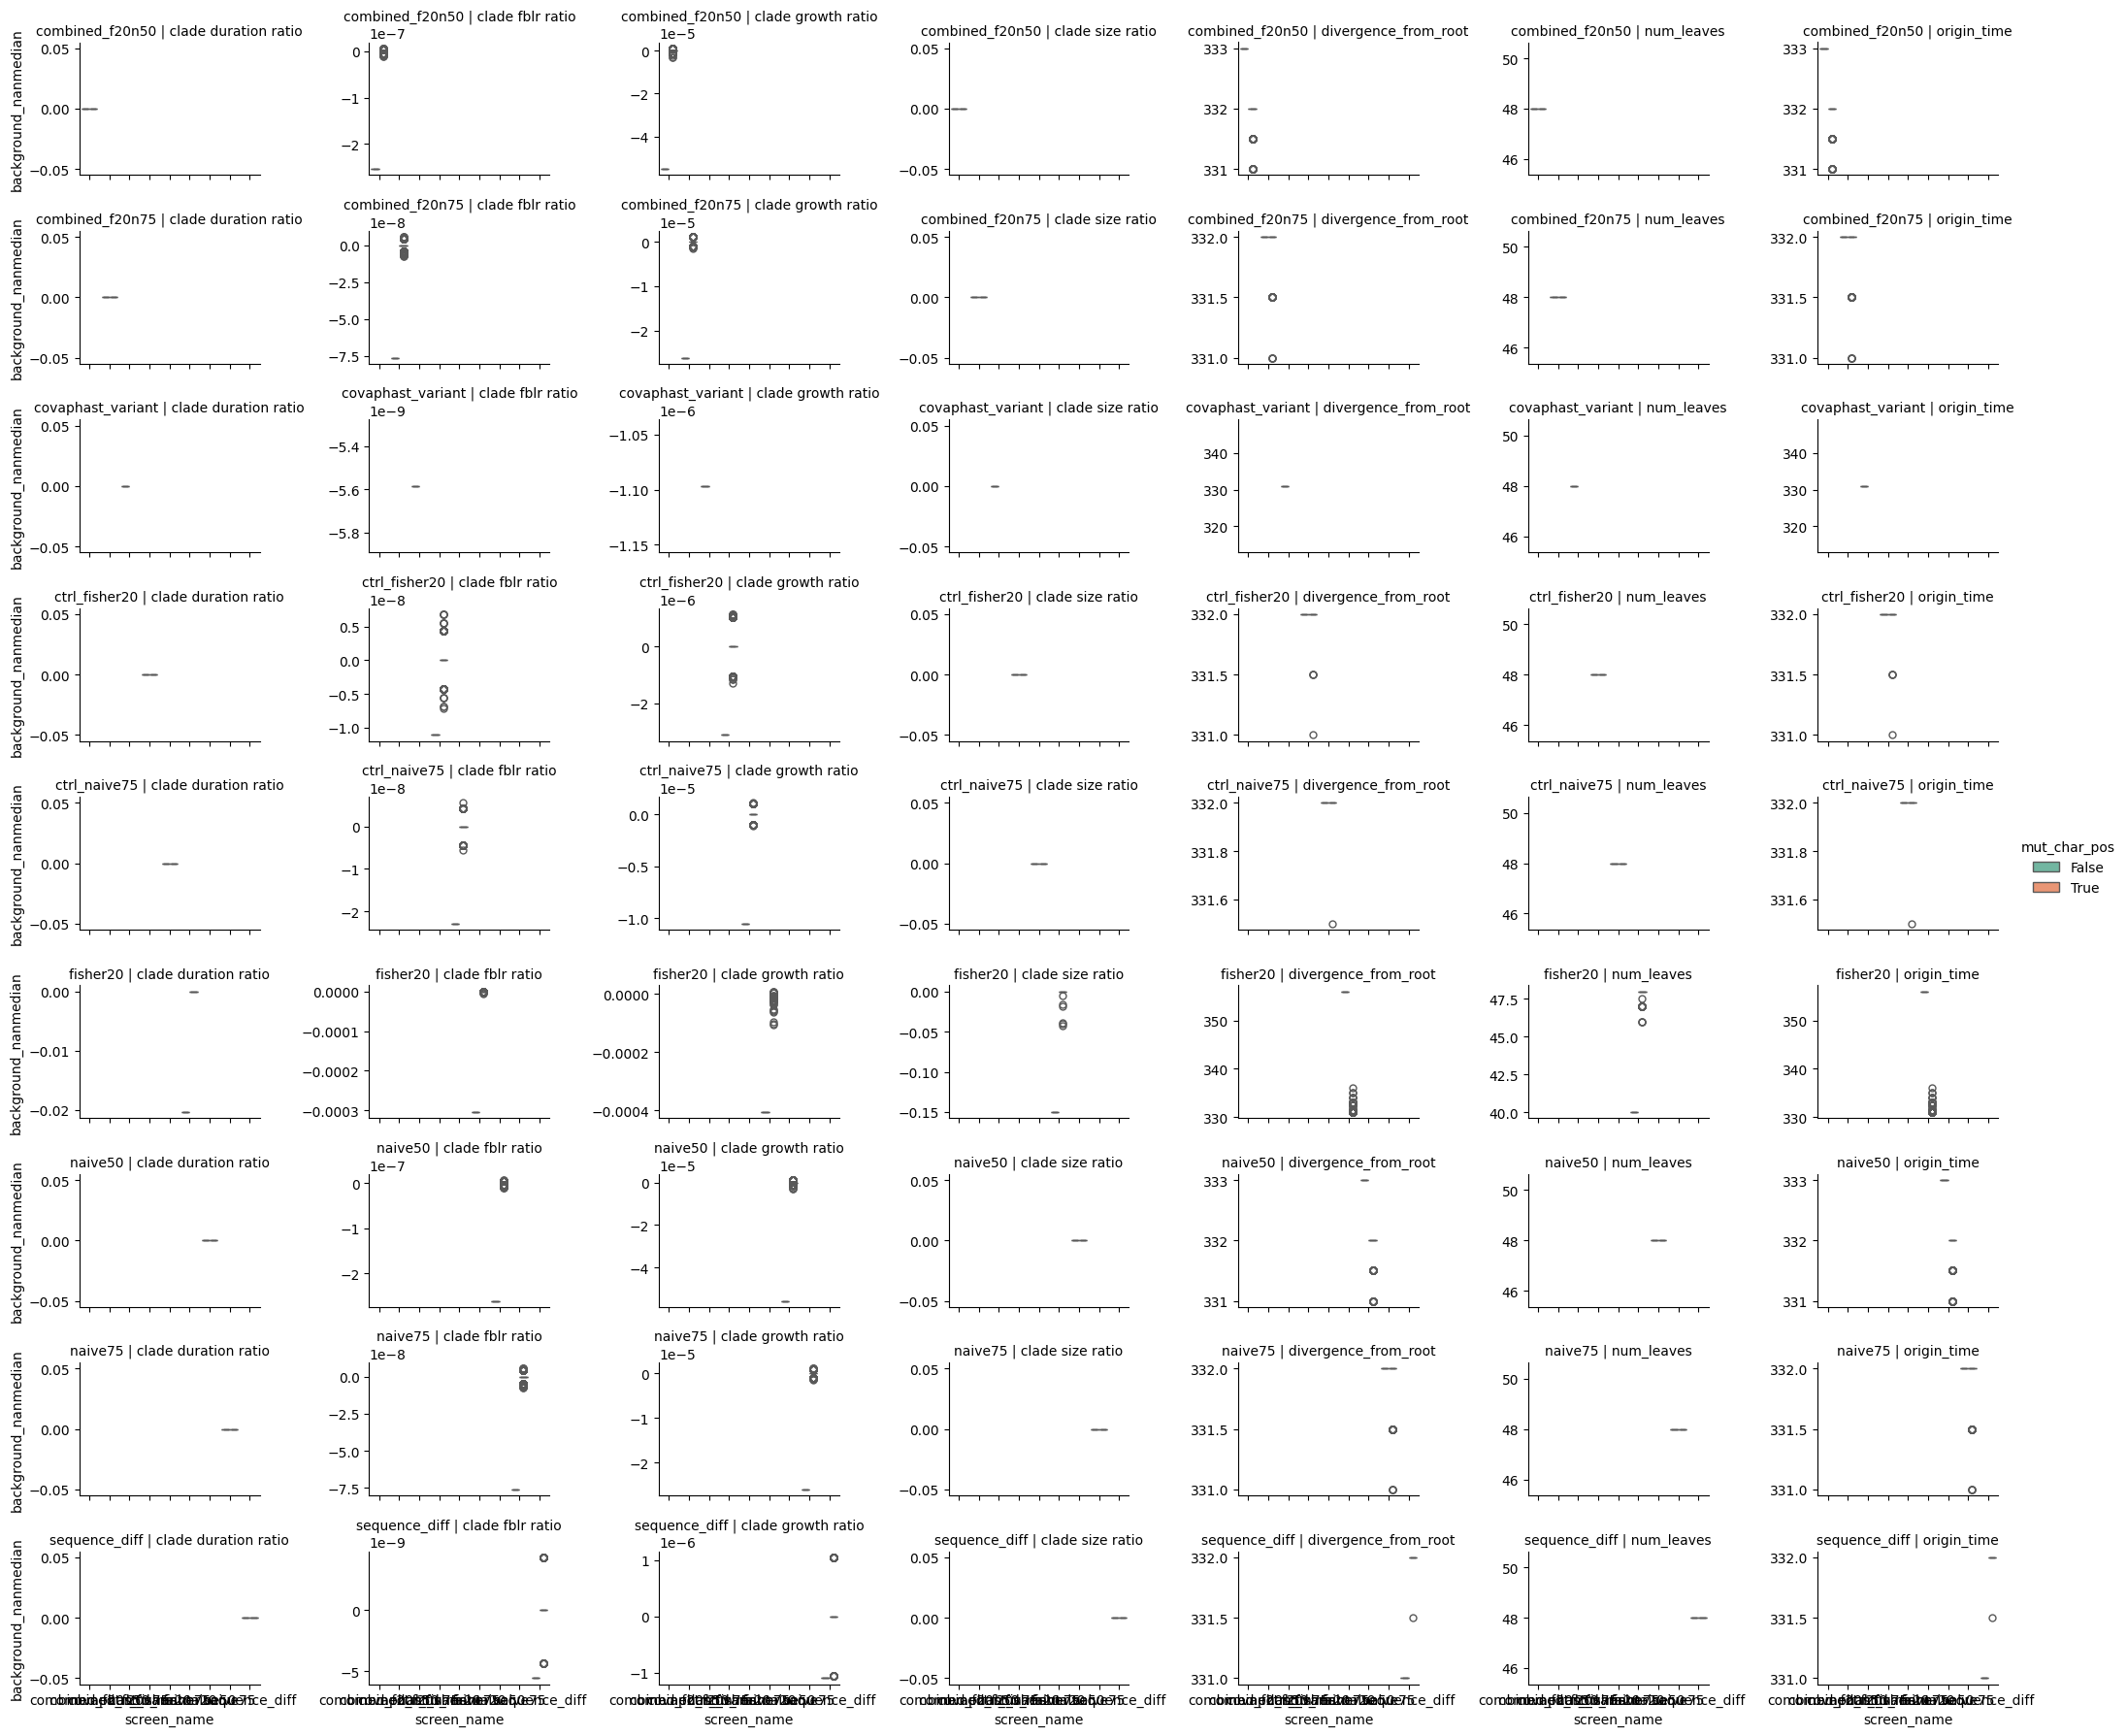

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
